# Heart rate detection example codes
Hardware 1 - Orientation to Health Technology<br>
Saed Abukar, 24.1.2024<br>
Metropolia University of Applied Sciences<br>

## Setup
Read in the necessary modules.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp

## Read data
The following code reads the data into a numpy array named `data` and creates a time vector, so we can plot the data.

In [8]:
# Reads the file into a numpy array
data = hp.get_data('capture01_250Hz.txt')
# Create a time vector
Fs = 250 # Sampling rate (samples per second)
time = np.arange(len(data))/Fs

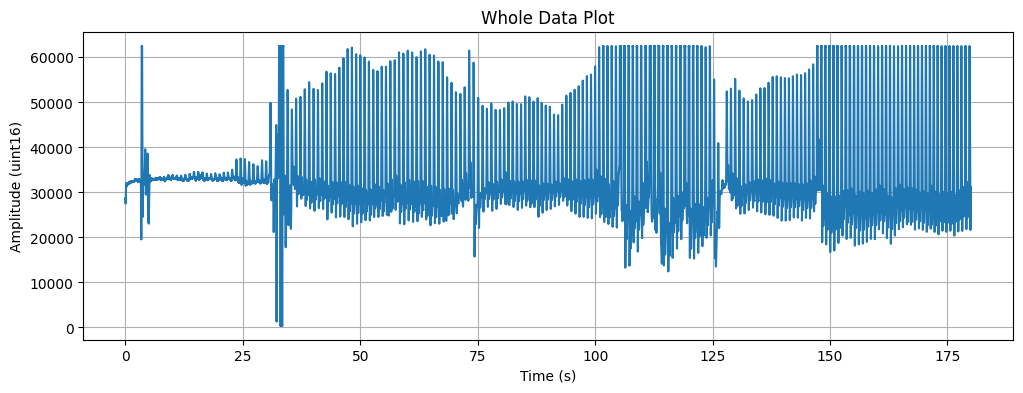

In [9]:
# Plot the whole data in a graphical figure
plt.figure(figsize = (12, 4))
plt.plot(time, data)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.title('Whole Data Plot')
plt.show()

## Data segment
Select randomly a 60 second data segment.

Segment starts from: 87 s


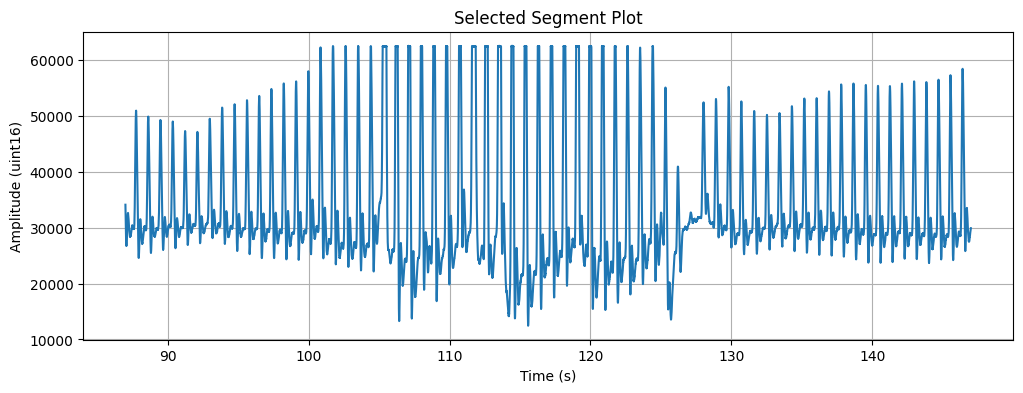

In [10]:
# Random seed based on the last four digits of the student ID number
np.random.seed(2849)
t0 = np.random.randint(30, 100)
print(f'Segment starts from: {t0} s')

# Select a segment
i = (t0 < time) & (time < t0 + 60)
data2 = data[i]
time2 = time[i]

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.title('Selected Segment Plot')
plt.show()

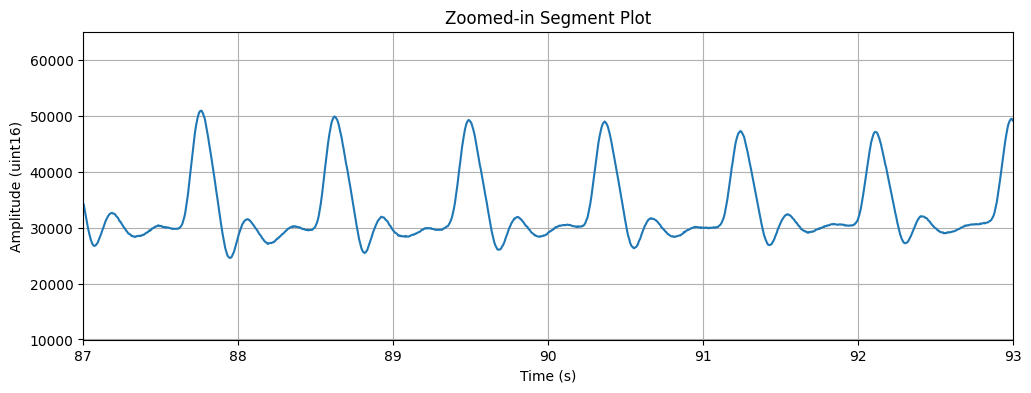

In [11]:
# Zoom in to the first 6 seconds to show the details of the signal

# Plot the selected segment
plt.figure(figsize = (12, 4))
plt.plot(time2, data2)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uint16)')
plt.title('Zoomed-in Segment Plot')
plt.xlim(t0, t0 + 6)
plt.show()

## Peak detection and HRV measurements

## Interpretations My interpretation of the results

In [12]:
# Perform peak detection and heart rate analysis
processed_data, measures = hp.process(data, sample_rate=Fs)

# Print and interpret the results
print(f'1. Average Heart Rate: {measures["bpm"]:.2f} BPM')
if 60 <= measures["bpm"] <= 100:
    print("   The average heart rate is within the normal range.")
elif measures["bpm"] < 60:
    print("   The average heart rate is considered low (bradycardia).")
else:
    print("   The average heart rate is considered high (tachycardia).")

print(f'2. Average Inter-beat-interval: {measures["ibi"]:.2f} milliseconds')
if 0.6 <= measures["ibi"] <= 1.0:
    print("   The average inter-beat-interval is within the normal range.")
elif measures["ibi"] < 0.6:
    print("   The average inter-beat-interval is considered low.")
else:
    print("   The average inter-beat-interval is considered high.")

print(f'3. SDNN (Standard Deviation of NN intervals): {measures["sdnn"]:.2f} ms')
# Interpretation based on SDNN: Higher SDNN suggests better HRV
if measures["sdnn"] > 50:
    print("   The variation in inter-beat-intervals (HRV) is considered high.")
else:
    print("   The variation in inter-beat-intervals (HRV) is considered low.")

print(f'4. Interpretation of Recovery and Stress Level:')
# Provide interpretation based on the collected measures and general knowledge about HRV
if measures["bpm"] <= 60 and measures["sdnn"] > 50:
    print("   The person seems to be in a well-recovered and relaxed state.")
elif measures["bpm"] > 100 or measures["sdnn"] < 30:
    print("   The person might be experiencing stress or fatigue.")
else:
    print("   The person's state is within a normal range.")

1. Average Heart Rate: 67.42 BPM
   The average heart rate is within the normal range.
2. Average Inter-beat-interval: 889.94 milliseconds
   The average inter-beat-interval is considered high.
3. SDNN (Standard Deviation of NN intervals): 41.69 ms
   The variation in inter-beat-intervals (HRV) is considered low.
4. Interpretation of Recovery and Stress Level:
   The person's state is within a normal range.
